In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score

In [2]:
def create_dataset(n_samples=5000, weights = (0.5,0.5), n_classes=2,
                   class_sep=0.8, n_clusters = 1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [3]:
#Membuat toy dataset

from sklearn.model_selection import train_test_split
X, y = create_dataset (n_samples=5000, weights = (0.92, 0.08), class_sep=0.8)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values
print ("Komponen dataset sebelum undersampling = {}" .format(Counter(y)))

#Undersampling Dataset
sampler = EditedNearestNeighbours(random_state = 0)
X_enn, y_enn = sampler.fit_resample (X_train , y_train)

#Train dataset dengan classifier
clf_logreg = LogisticRegression(C=0.1, penalty='l1').fit(X_enn,y_enn)
clf_knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='euclidean').fit(X_enn, y_enn)
clf_svm = SVC(gamma=2, C=1).fit(X_enn, y_enn)
clf_dt = DecisionTreeClassifier(max_depth=5).fit(X_enn, y_enn)
clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto').fit(X_enn, y_enn)

print ("Komponen dataset setelah undersampling = {}" .format(Counter(y_enn)))

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))



Komponen dataset sebelum undersampling = Counter({0: 4582, 1: 418})


c:\users\muhsin ahadi\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Komponen dataset setelah undersampling = Counter({0: 3589, 1: 337})
Komponen training set = Counter({0: 3663, 1: 337})
Komponen testing set = Counter({0: 919, 1: 81})


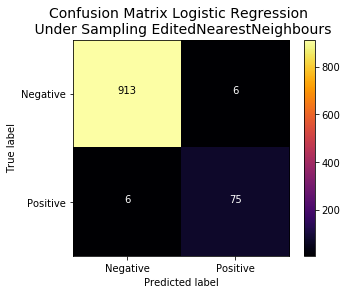

In [4]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred_log_reg = clf_logreg.predict(X_test)


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Negative', 'Positive']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(log_reg_cf, labels, title="Confusion Matrix Logistic Regression \n Under Sampling {}" .format(sampler.__class__.__name__) , cmap=plt.cm.inferno)

In [5]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
##Logistic Regression
print ("Pengukuran Performa Training Set hasil ENN: \n")
y_pred_logreg = clf_logreg.predict(X_enn)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_logreg)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_logreg)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_logreg)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_logreg)

print ("G-Mean untuk Logistic Regresion with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#KNearest Neighbor
y_pred_knn = clf_knn.predict(X_enn)

print ('\nClassification Report K Nearest Neighbor:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_knn)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_knn)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_knn)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_knn)

print ("G-Mean untuk K Nearest Neighbor with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#SVM
y_pred_svm = clf_svm.predict(X_enn)

print ('\nClassification Report Support Vector Machine:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_svm)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_svm)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_svm)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_svm)

print ("G-Mean untuk Support Vector Machine with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Decision Tree
y_pred_dt = clf_dt.predict(X_enn)

print ('\nClassification Report Decision Tree:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_dt)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_dt)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_dt)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_dt)

print ("G-Mean untuk Decision Tree with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Random Forest
y_pred_rf = clf_rf.predict(X_enn)

print ('\nClassification Report Random Forest:')
print('Recall Score: {:.2f}'.format(recall_score(y_enn, y_pred_rf)))
print('Precision Score: {:.2f}'.format(precision_score(y_enn, y_pred_rf)))
print('F1 Score: {:.2f}'.format(f1_score(y_enn, y_pred_rf)))

G_mean_under_sampling_enn = geometric_mean_score (y_enn, y_pred_rf)

print ("G-Mean untuk Random Forest with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

Pengukuran Performa Training Set hasil ENN: 

Classification Report Logistic Regression:
Recall Score: 0.95
Precision Score: 0.97
F1 Score: 0.96
G-Mean untuk Logistic Regresion with EditedNearestNeighbours:  0.9732285102308678

Classification Report K Nearest Neighbor:
Recall Score: 0.95
Precision Score: 1.00
F1 Score: 0.98
G-Mean untuk K Nearest Neighbor with EditedNearestNeighbours:  0.9759724664112601

Classification Report Support Vector Machine:
Recall Score: 0.95
Precision Score: 1.00
F1 Score: 0.97
G-Mean untuk Support Vector Machine with EditedNearestNeighbours:  0.9744510742681919

Classification Report Decision Tree:
Recall Score: 0.95
Precision Score: 1.00
F1 Score: 0.97
G-Mean untuk Decision Tree with EditedNearestNeighbours:  0.9744510742681919

Classification Report Random Forest:
Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.96
G-Mean untuk Random Forest with EditedNearestNeighbours:  0.9630625380482576


In [6]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print ("Pengukuran Performa terhadap Testing Set: \n")

##Logistic Regression
y_pred_logreg = clf_logreg.predict(X_test)

print ('Classification Report Logistic Regression:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_logreg)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_logreg)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_logreg)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_logreg)

print ("G-Mean untuk Logistic Regresion with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#KNearest Neighbor
y_pred_knn = clf_knn.predict(X_test)

print ('\nClassification Report K Nearest Neighbor:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_knn)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_knn)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_knn)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_knn)

print ("G-Mean untuk K Nearest Neighbor with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#SVM
y_pred_svm = clf_svm.predict(X_test)

print ('\nClassification Report Support Vector Machine:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_svm)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_svm)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_svm)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_svm)

print ("G-Mean untuk Support Vector Machine with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Decision Tree
y_pred_dt = clf_dt.predict(X_test)

print ('\nClassification Report Decision Tree:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_dt)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_dt)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_dt)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_dt)

print ("G-Mean untuk Decision Tree with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

#Random Forest
y_pred_rf = clf_rf.predict(X_test)

print ('\nClassification Report Random Forest:')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred_rf)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred_rf)))

G_mean_under_sampling_enn = geometric_mean_score (y_test, y_pred_rf)

print ("G-Mean untuk Random Forest with {}: " .format(sampler.__class__.__name__) , G_mean_under_sampling_enn)

Pengukuran Performa terhadap Testing Set: 

Classification Report Logistic Regression:
Recall Score: 0.93
Precision Score: 0.93
F1 Score: 0.93
G-Mean untuk Logistic Regresion with EditedNearestNeighbours:  0.9591041172331333

Classification Report K Nearest Neighbor:
Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
G-Mean untuk K Nearest Neighbor with EditedNearestNeighbours:  0.9601540399527951

Classification Report Support Vector Machine:
Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
G-Mean untuk Support Vector Machine with EditedNearestNeighbours:  0.9601540399527951

Classification Report Decision Tree:
Recall Score: 0.93
Precision Score: 0.94
F1 Score: 0.93
G-Mean untuk Decision Tree with EditedNearestNeighbours:  0.9596292221819899

Classification Report Random Forest:
Recall Score: 0.93
Precision Score: 0.95
F1 Score: 0.94
G-Mean untuk Random Forest with EditedNearestNeighbours:  0.9601540399527951
